In [1]:
"""
This code belongs to the paper:
-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 5-DOF linear structural system with tuned mass damper.
"""

'\nThis code belongs to the paper:\n-- Y.C. Mathpati, K.S. More, T. Tripura, R. Nayek, S. Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 5-DOF linear structural system with tuned mass damper.\n'

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actual_1 = "TMD_actual_relia_data_5000.p"
file_actual_1 = open(actual_1, 'rb')
file_obj_actual_1 = pickle.load(file_actual_1)
actual_1 = np.array(file_obj_actual_1)
actual_1.shape

(12, 5000, 60001)

In [3]:
actual_2 = "TMD_actual_relia_data_5000_to_10000.p"
file_actual_2 = open(actual_2, 'rb')
file_obj_actual_2 = pickle.load(file_actual_2)
actual_2 = np.array(file_obj_actual_2)
actual_2.shape

(12, 5000, 60001)

In [4]:
y11 = actual_1[0]
y12 = actual_2[0]
y11.shape, y12.shape

((5000, 60001), (5000, 60001))

In [5]:
np.vstack((y11, y12)).shape

(10000, 60001)

In [6]:
y9_1 = actual_1[8]

In [7]:
y9_2 = actual_2[8]

In [8]:
y9 = np.vstack((y9_1, y9_2))
y9.shape

(10000, 60001)

In [9]:
a = np.linspace(0,30,60001)

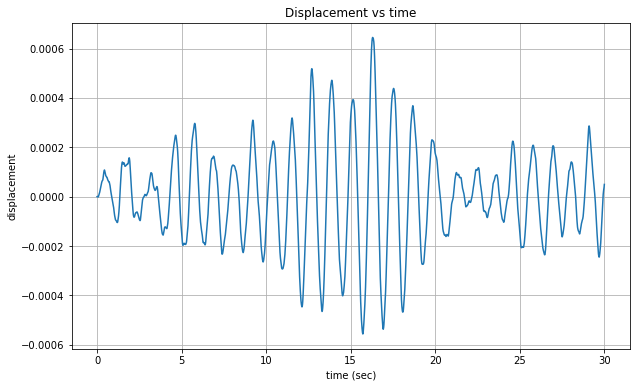

In [10]:
plt.figure(figsize=(10,6))
plt.xlim()
plt.plot(a,np.mean(y9, axis=0))
plt.title('Displacement vs time')
plt.xlabel('time (sec)')
plt.ylabel('displacement')
plt.grid()
plt.savefig('states_tmd.pdf')
plt.show()


Probabilty of Failure : 0.0133


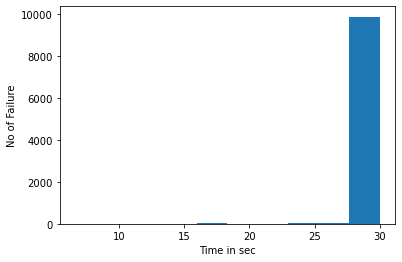

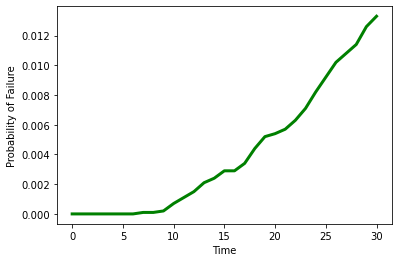

In [11]:
idx = [np.where(y9[i,:]>0.0614) for i in range(10000)]

count = 0
for i in idx:
    if len(i[0])!=0:
        count += 1
        
print("Probabilty of Failure :", count/len(idx))

ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/2000)
    else:
        ans.append(60000/2000)
        
plt.hist(ans)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()

pf_count_per_t = set()
prob_fail = []
for i in range(60001):
    colmn = y9[:,i]
    ans = np.where(colmn>0.0614)
    for i in ans[0]:
        pf_count_per_t.add(i)
        
    no_of_fail = len(pf_count_per_t)
    prob_fail.append(no_of_fail/10000)
    
final_ans = []
for i in range(len(prob_fail)):
    if i%2000 == 0:
        final_ans.append(prob_fail[i])
    
plt.plot(final_ans, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

In [12]:
max(final_ans)

0.0133

In [13]:
final_1 = "TMD_Final_relia_data_5000.p"
file_final_1 = open(final_1, 'rb')
file_obj_final_1 = pickle.load(file_final_1)
final_1 = np.array(file_obj_final_1)
final_1.shape

(12, 5000, 60001)

In [14]:
final_2 = "TMD_Final_relia_data_5000_to_10000.p"
file_final_2 = open(final_2, 'rb')
file_obj_final_2 = pickle.load(file_final_2)
final_2 = np.array(file_obj_final_2)
final_2.shape

(12, 5000, 60001)

In [15]:
y9_1_f = final_1[8]
y9_2_f = final_2[8]

In [16]:
final_2[8].shape

(5000, 60001)

In [17]:
y9_1_f.shape

(5000, 60001)

In [18]:
y9_f = np.vstack((y9_1_f, y9_2_f))
y9_f.shape

(10000, 60001)

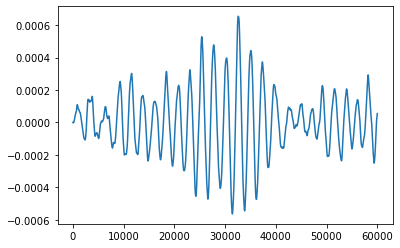

In [19]:
plt.plot(np.mean(y9_f, axis=0))

Probabilty of Failure : 0.0149


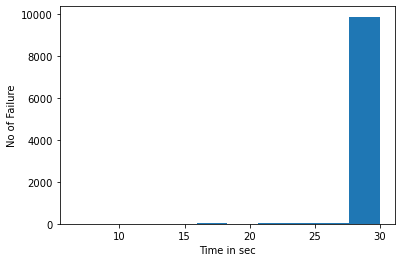

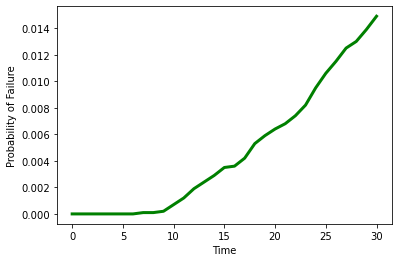

In [20]:
idx_f = [np.where(y9_f[i,:]>0.0614) for i in range(10000)]
count_f = 0
for i in idx_f:
    if len(i[0])!=0:
        count_f += 1
        
print("Probabilty of Failure :", count_f/len(idx_f))

ans_f = []
for i in idx_f:
    if len(i[0])!=0:
        ans_f.append((i[0][0])/2000)
    else:
        ans_f.append(60000/2000)
        
plt.hist(ans_f)
plt.xlabel('Time in sec')
plt.ylabel('No of Failure')
plt.show()


pf_count_per_t_f = set()
prob_fail_f = []
for i in range(60001):
    colmn = y9_f[:,i]
    ans = np.where(colmn>0.0614)
    for i in ans[0]:
        pf_count_per_t_f.add(i)
        
    no_of_fail_f = len(pf_count_per_t_f)
    prob_fail_f.append(no_of_fail_f/10000)
    
final_ans_f = []
for i in range(len(prob_fail_f)):
    if i%2000 == 0:
        final_ans_f.append(prob_fail_f[i])
    
plt.plot(final_ans_f, linewidth=3, color='green')
plt.xlabel('Time')
plt.ylabel('Probability of Failure')
plt.show()

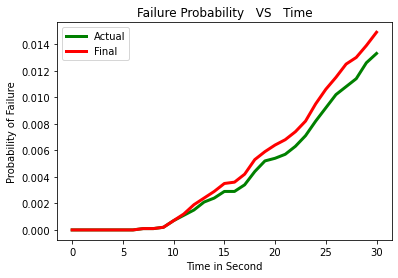

In [21]:
plt.plot(final_ans, color='green', linewidth=3, label="Actual")
plt.plot(final_ans_f, color='red', linewidth=3, label="Final")
plt.xlabel('Time in Second')
plt.ylabel('Probability of Failure')
plt.legend()
plt.title('Failure Probability   VS   Time')
plt.show()

In [22]:
max(final_ans), max(final_ans_f)

(0.0133, 0.0149)

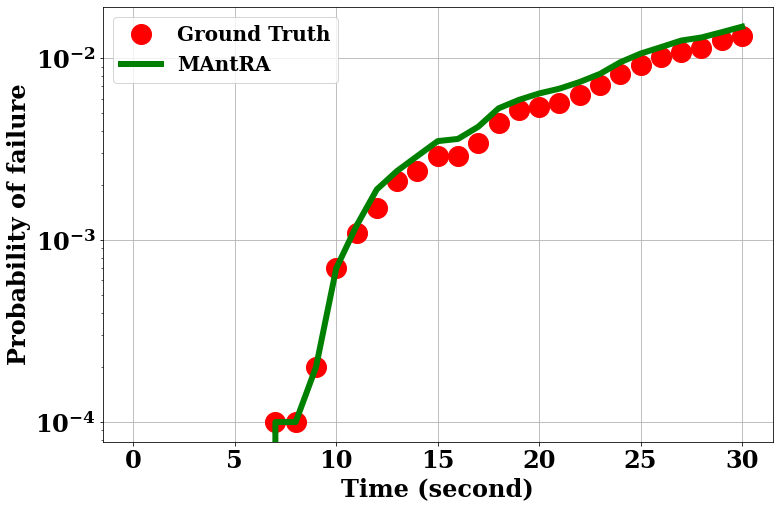

In [48]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_ans, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_ans_f,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=2)
plt.grid()
plt.savefig('reliability tmd.pdf')
plt.show()
# plt.savefig('rel_tmd.pdf')